# Advanced programming for data science 2612

## 2021 Exam, practical component

* The exam is accompanied by a quiz in Moodle.
* The practical component is 80% of the total grade of the exam. The Quiz is thus 20% of the total grade of the exam.
* The quiz will test the more theoretical elements of the course.
* The quiz has a similar structure to previous quizes. You should spend 20 minutes on the quiz and the remaining here.
* The total duration of the exam, 3 hours, is shared between quiz and this practical component.

---
<div class="alert alert-danger">
    <b>Make sure you have the following packages: numpy, matplotlib, pandas, seaborn, pytest, python=3.8, jupyter-lab=3.0.<b>
</div>

<div class="alert alert-danger">
    <b>When instructed about a method of a class having "no inputs", remember we are not including "self". The "self" parameter should always be the first input of methods inside classes.<b>
</div>

<div class="alert alert-warning">
    <b>You may do things in a manner where you get a pandas warning for setting values in a dataframe. It is fine, just make sure the values are correct.<b>
</div>

---
## Welcome to micro project BranStorm!

BranStorm was a startup in 1987 that failed to launch. BranStorm's goal was to identify the healthiest cereal brand on the market, to make an advertising blitz of that cereal as "the healthiest cereal".

During a week, BranStorm analysed the chemical components of several breakfast cereals on their most important nutritional aspects. They produced a dataset with the following information:

* name: Name of the cereal
* calories: calories per serving
* protein: grams of protein per serving
* fat: grams of fat per serving
* sodium: miligrams of sodium per serving
* fiber: grams of dietary fiber per serving
* carbo: grams of complex carbohydrates per serving
* sugars: grams of sugars per serving
* potass: miligrams of postassium per serving
* vitamins: vitamins and minerals - 0, 25, or 100, rounded percentage of recommended vitamins per serving
* shelf: display shelf (1, 2, or 3, counting from the floor)
* cups: number of cups in one serving
* analysis_date: date when the nutrient analysis of the cereal was made

You are a Data Scientist in the present working for the number 3 brand in the market, __FasT BreaK!__. The president of FasT BreaK! knows of the past efforts of BranStorm, as the study became an Urban Legend in the breakfast cereal world.

Although you are not an expert on nutrition, you know your way around data, and you love breakfast cereals.

The dataset for the tests is in the __cereals.csv__ file. With it, you are going to try and discover what happened to BranStorm's failed efforts. Your goal is to try to find what was the best cereal in 1987. With your findings, FasT BreaK! will try to learn what the best cereal can still look like today.

---
# 1-Importing the data (10%)
1. Import pandas, numpy, and matpotlib. You may also import seaborn if it helps you with plots.
1. Read the dataset into a pandas dataframe. Does the data format look correct? Make sure you read the dataframe with the correct separator. Print the head() of the dataframe to be sure.

# 2-Class for Data exploration

You decide to create a class for the analysis process. If the study is picked up by the BreaK FasT! company in the future, you will be ready.



In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('cereals.csv', delimiter = "|")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           77 non-null     object 
 1   calories       77 non-null     int64  
 2   protein        77 non-null     int64  
 3   fat            77 non-null     int64  
 4   sodium         77 non-null     int64  
 5   fiber          77 non-null     float64
 6   carbo          77 non-null     float64
 7   sugars         77 non-null     int64  
 8   potass         77 non-null     int64  
 9   vitamins       77 non-null     int64  
 10  shelf          77 non-null     int64  
 11  cups           77 non-null     float64
 12  analysis_date  77 non-null     object 
 13  weekday        77 non-null     int64  
 14  name_weekday   77 non-null     object 
 15  alk_con        77 non-null     int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 9.8+ KB


In [ ]:
df['analysis_date'] = pd.to_datetime(df['analysis_date'], format='%Y-%m-%d')
# df['name_weekday'] = pd.to_datetime(df['name_weekday'], format = '%A', errors = 'coerce')

In [33]:
df.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,cups,analysis_date,weekday,name_weekday,alk_con
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,3,0.33,1987-04-06,0,Monday,410
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1987-04-08,2,Wednesday,150
2,All-Bran,70,4,1,260,9.0,7.0,3,320,25,3,0.33,1987-04-06,0,Monday,580
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,3,330,25,3,0.50,1987-04-06,0,Monday,470
4,Almond Delight,110,2,2,200,1.0,14.0,8,7,25,3,0.75,1987-04-07,1,Tuesday,207


## 2.1 - The \_\_init\_\_ (30%)

1. Write a class called Cereal. In the \_\_init\_\_ method import the dataframe like you did before. The init() method should have two parameters, "file_name" and "delimiter". The dataframe should now be a parameter of the class (i.e. self.df = ...).
1. (Still in the init()) The nutritionist you are consulting tells you the __Alkaline Content__ is the sum of __Sodium+Potassium__ and is a very important parameter. Make a column in the dataframe called __"alk_con"__ which is the sum of the two relevant kpis.
1. From self.df, create a new class parameter called self.nutritional_df, which will be a dataframe. This dataframe should only hold the __nutritional components__ of your original dataset:, an calories, protein, fat, fiber, carbo, sugars, vitaminsd alkaline content.
1. Since you are planning on doing correlations among KPIs in the future, add the following to the class:

```python
self.correlation_matrix = None
```



In [41]:
df.head(1)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,cups,analysis_date,weekday,name_weekday,alk_con
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,3,0.33,1987-04-06,0,Monday,410


In [52]:
class Cereal:
    def __init__(self, file_name, delimiter):
        self.file_name = file_name
        self.delimiter = delimiter

        try:
            self.df = pd.read_csv(self.file_name, delimiter = self.delimiter)
        except FileNotFoundError:
            print("File not found")

        self.df['analysis_date'] = pd.to_datetime(self.df['analysis_date'], format='%Y-%m-%d')

        self.df['alk_con'] = self.df['sodium'] + self.df['potass']
        self.nutritional_df = self.df[['name', 'protein',	'fat',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'vitamins', 'alk_con']]

        self.correlation_matrix = None

In [55]:
data = Cereal('cereals.csv', '|')
data.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           77 non-null     object        
 1   calories       77 non-null     int64         
 2   protein        77 non-null     int64         
 3   fat            77 non-null     int64         
 4   sodium         77 non-null     int64         
 5   fiber          77 non-null     float64       
 6   carbo          77 non-null     float64       
 7   sugars         77 non-null     int64         
 8   potass         77 non-null     int64         
 9   vitamins       77 non-null     int64         
 10  shelf          77 non-null     int64         
 11  cups           77 non-null     float64       
 12  analysis_date  77 non-null     datetime64[ns]
 13  weekday        77 non-null     int64         
 14  name_weekday   77 non-null     object        
 15  alk_con        77 non-nul

## 2.2 - The daily_analysis (15%)

1. Create a method of Cereal called daily_analysis.
1. Convert the analysis_date column of self.df into datetime. Make a new column in the dataframe with the corresponding weekday or name of the week day. The method has no output nor additional inputs. The method should plot a matplotlib barplot or a seaborn countplot of the number of total_tests per weekday (or name of the week day, whichever you chose previously).



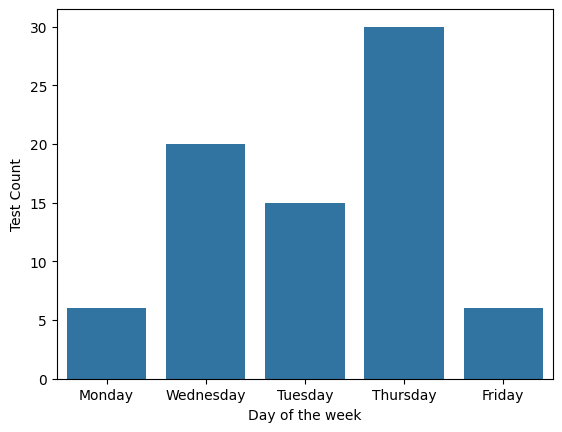

In [75]:
class Cereal:
    def __init__(self, file_name, delimiter):
        self.file_name = file_name
        self.delimiter = delimiter

        try:
            self.df = pd.read_csv(self.file_name, delimiter = self.delimiter)
        except FileNotFoundError:
            print("File not found")

        self.df['analysis_date'] = pd.to_datetime(self.df['analysis_date'], format='%Y-%m-%d')

        self.df['alk_con'] = self.df['sodium'] + self.df['potass']
        self.nutritional_df = self.df[['name', 'protein',	'fat',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'vitamins', 'alk_con']]

        self.correlation_matrix = None

    def daily_analysis(self):
        self.df['name_of_weekday'] = self.df['analysis_date'].dt.day_name()

        sns.countplot(x='name_of_weekday', data=self.df)
        plt.xlabel('Day of the week')
        plt.ylabel('Test Count')
        plt.show()


data = Cereal('cereals.csv', '|')
data.daily_analysis()

## 2.3 - corr (15%)

1. Write a corr() method for class Cereal. Calculate the correlation matrix of the nutritional_df dataframe and store it the appropriate parameter you created in \_\_init\_\_. 
1. The corr() method should also plot the correlation plot between the __nutritional components__ of your dataset: calories, protein, fat, fiber, carbo, sugars, vitamins, and alkaline content, that you previously stored in self.nutritional_df.




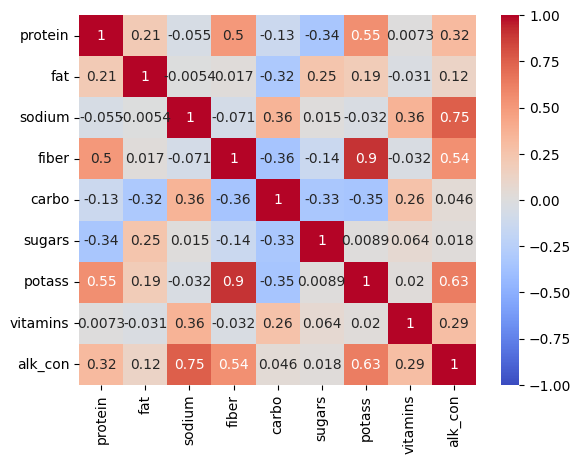

In [88]:
class Cereal:
    def __init__(self, file_name, delimiter):
        self.file_name = file_name
        self.delimiter = delimiter

        try:
            self.df = pd.read_csv(self.file_name, delimiter = self.delimiter)
        except FileNotFoundError:
            print("File not found")

        self.df['analysis_date'] = pd.to_datetime(self.df['analysis_date'], format='%Y-%m-%d')

        self.df['alk_con'] = self.df['sodium'] + self.df['potass']
        self.nutritional_df = self.df[['protein',	'fat',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'vitamins', 'alk_con']]

        self.correlation_matrix = self.nutritional_df.corr()

    def daily_analysis(self):
        self.df['name_of_weekday'] = self.df['analysis_date'].dt.day_name()

        sns.countplot(x='name_of_weekday', data=self.df)
        plt.xlabel('Day of the week')
        plt.ylabel('Test Count')
        plt.show()

    def corr(self):
        sns.heatmap(self.correlation_matrix, vmin=-1, vmax = 1, cmap = 'coolwarm', annot=True)
        plt.show()



data = Cereal('cereals.csv', '|')
data.corr()

## 2.4 - vita (10%)

Whilst researching scientific papers about nutrition, you discover that there is great parameter called __vita__ (from the Latin "life") which describes how healty food is based on its nutritional value. The formula is

$$\frac{fiber \times protein}{sugars \times alkaline-content}$$

and the units for the formula are already the ones you have for the dataframe.

1. Add a vita() method to Cereal.
1. Calculate the vita parameter from the formula inside the vita() method.
1. The vita() method should do a scatter plot of the vita parameter as a function of the sugars column.




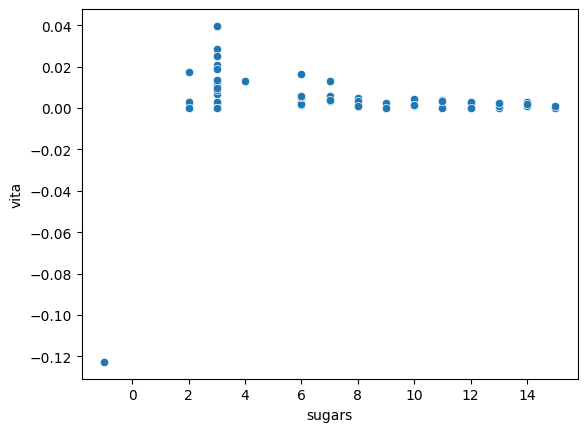

In [94]:
class Cereal:
    def __init__(self, file_name, delimiter):
        self.file_name = file_name
        self.delimiter = delimiter

        try:
            self.df = pd.read_csv(self.file_name, delimiter = self.delimiter)
        except FileNotFoundError:
            print("File not found")

        self.df['analysis_date'] = pd.to_datetime(self.df['analysis_date'], format='%Y-%m-%d')

        self.df['alk_con'] = self.df['sodium'] + self.df['potass']
        self.nutritional_df = self.df[['protein',	'fat',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'vitamins', 'alk_con']]

        self.correlation_matrix = self.nutritional_df.corr()

    def vita(self):
        self.df['vita'] = (self.df['fiber'] * self.df['protein']) / (self.df['sugars'] * self.df['alk_con'] )    
        sns.scatterplot(y = 'vita', x = 'sugars', data = self.df)
        plt.show()

    def daily_analysis(self):
        self.df['name_of_weekday'] = self.df['analysis_date'].dt.day_name()

        sns.countplot(x='name_of_weekday', data=self.df)
        plt.xlabel('Day of the week')
        plt.ylabel('Test Count')
        plt.show()

    def corr(self):
        sns.heatmap(self.correlation_matrix, vmin=-1, vmax = 1, cmap = 'coolwarm', annot=True)
        plt.show()



data = Cereal('cereals.csv', '|')
data.vita()

# 3-Assembling the story (10%)

1. Create an instance __cereal__ of class __Cereal__.
1. Run the daily_analysis, corr, and vita methods. You should have 3 plots.
1. In which day of the week did BranStorm conduct more tests, according to your plot? This will tell how many tests you can do in a day, in the future. 
1. The perfect cereal should have a low __Alkaline Content__. However, the correlation matrix shows an interesting relation between __alkaline content__ and all the other nutritional KPIs. What happens to __alkaline content__ if we increase fiber, protein, or vitamins? To clarify to all KPIs, use a sort_values method on the correlation matrix filtered by __alk_con__. Example: cereal.correlation_matrix['alk_con'].sort_values(). What are the two other most correlated nutritional KPIs with 'alk_con'? (you can do this outside of the class). These two KPIs actually make sense, given the numerator for vita.
1. Knowing the variables must all be positive, what can you tell by the plot vita() produces?



3. Thursday
4. Sodium, Potass, Fiber, Protein, Vitamins
5. There are isuses with some sugars being negative


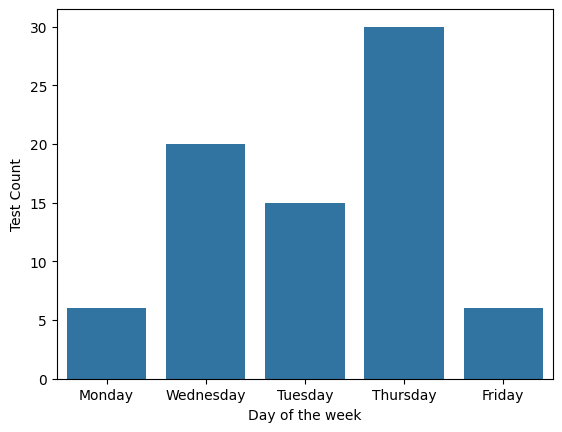

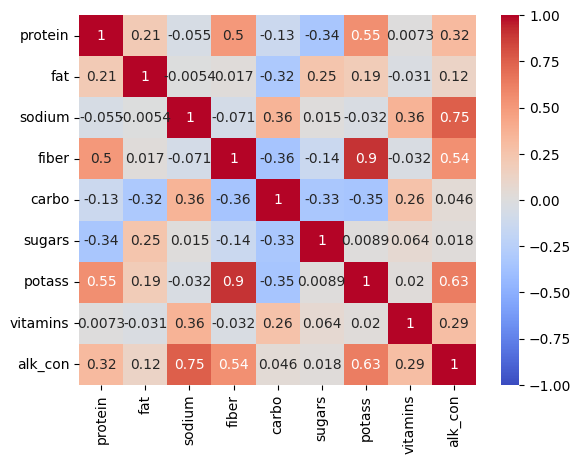

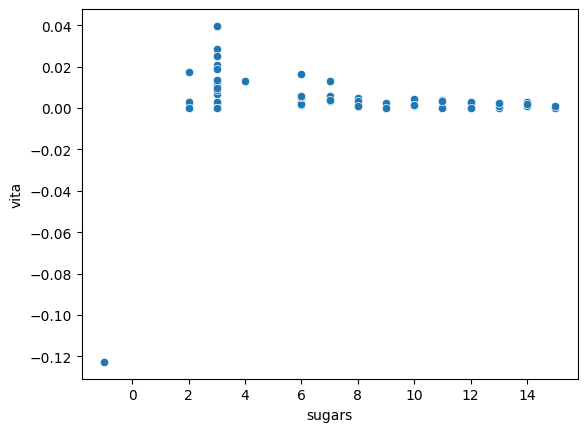

In [96]:
data.daily_analysis()
data.corr()
data.vita()

# 4-The sweet spot (10%)

By now you realise the previous team in 1987 made a serious error when inputting the "sugars" data. While consulting the original database, you notice an extra negative sign in the entry.

1. Add an input parameter to the vita method (keep editing your class). This input should be called "absolute" and should have a default boolean value of False. If boolean is set to True, vita should change the value of self.nutrition_df to its absoulute value (use numpy's np.abs to replace self.nutrition_df with  the absolute value of self.nutrition_df).
1. To harden the process, if vita receives an entry for the absolute "absolute" with a __type__ other than bool, it should raise the appropriate error with a clear message to the user.
1. Run the new declaration of Cereal with the vita method now receiving "absolute" as __True__.
1. Can you identify which was the champion cereal in 1987? It should be the cereal with the lower sugars and highest vita, after correction.

<div class="alert alert-warning">
    <b>Don't forget to write one-line docstrings where appropriate.<b>
</div>

---

In [ ]:
class Cereal:
    def __init__(self, file_name, delimiter):
        self.file_name = file_name
        self.delimiter = delimiter

        try:
            self.df = pd.read_csv(self.file_name, delimiter = self.delimiter)
        except FileNotFoundError:
            print("File not found")

        self.df['analysis_date'] = pd.to_datetime(self.df['analysis_date'], format='%Y-%m-%d')

        self.df['alk_con'] = self.df['sodium'] + self.df['potass']
        self.nutritional_df = self.df[['protein',	'fat',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'vitamins', 'alk_con']]

        self.correlation_matrix = self.nutritional_df.corr()

    def vita(self):
        self.df['vita'] = (self.df['fiber'] * self.df['protein']) / (self.df['sugars'] * self.df['alk_con'] )    
        sns.scatterplot(y = 'vita', x = 'sugars', data = self.df)
        plt.show()

    def daily_analysis(self):
        self.df['name_of_weekday'] = self.df['analysis_date'].dt.day_name()

        sns.countplot(x='name_of_weekday', data=self.df)
        plt.xlabel('Day of the week')
        plt.ylabel('Test Count')
        plt.show()

    def corr(self):
        sns.heatmap(self.correlation_matrix, vmin=-1, vmax = 1, cmap = 'coolwarm', annot=True)
        plt.show()



data = Cereal('cereals.csv', '|')
data.vita()